In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
import librosa
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
import tensorflow as tf
from sklearn.metrics import classification_report



import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, roc_curve, accuracy_score, plot_confusion_matrix

import missingno as msno
from matplotlib import pyplot as plt

import imp
from nltk.util import ngrams
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,LayerNormalization,BatchNormalization,Dropout,Conv1D,MaxPooling1D,GlobalMaxPooling1D,GlobalAveragePooling1D,Activation,Input,concatenate,Reshape



from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
import tensorflow as tf


from scipy import interpolate
import librosa

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from tensorflow.keras.preprocessing.text import Tokenizer

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf

import imp
from nltk.util import ngrams
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,Permute

from sklearn.preprocessing import OneHotEncoder,LabelEncoder


Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

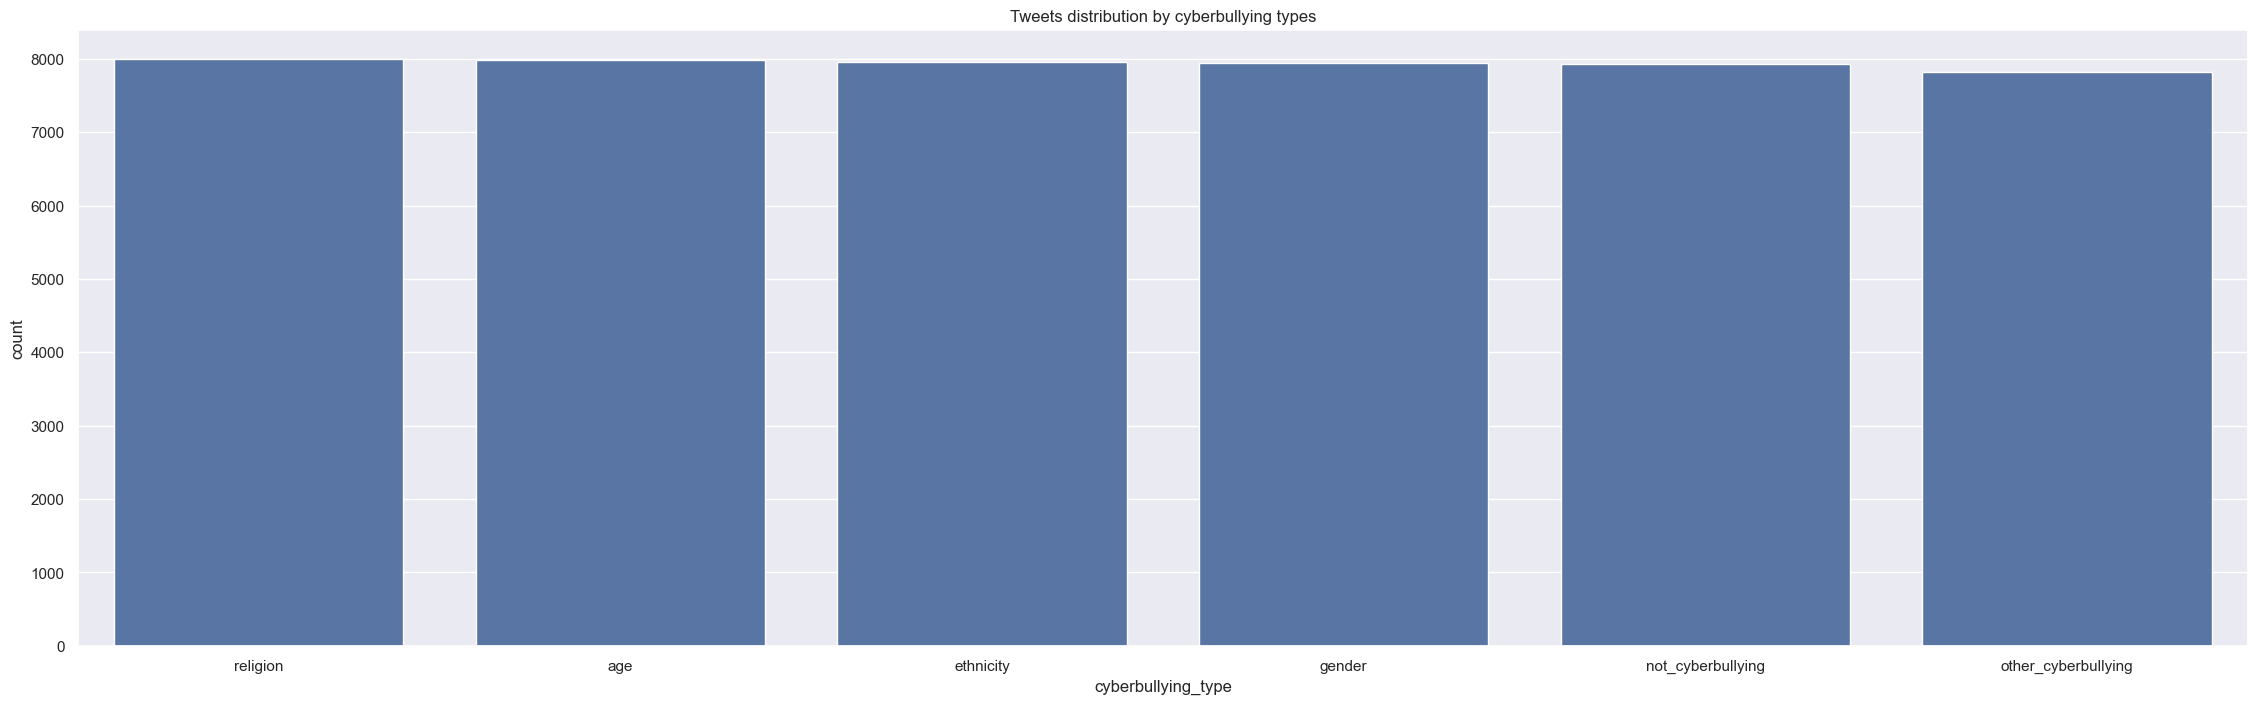

In [18]:
df = pd.read_csv("C:/Users/dianu/OneDrive/Desktop/Final_results/dataset/categorical_data.csv")
df = df.drop_duplicates()
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")


Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

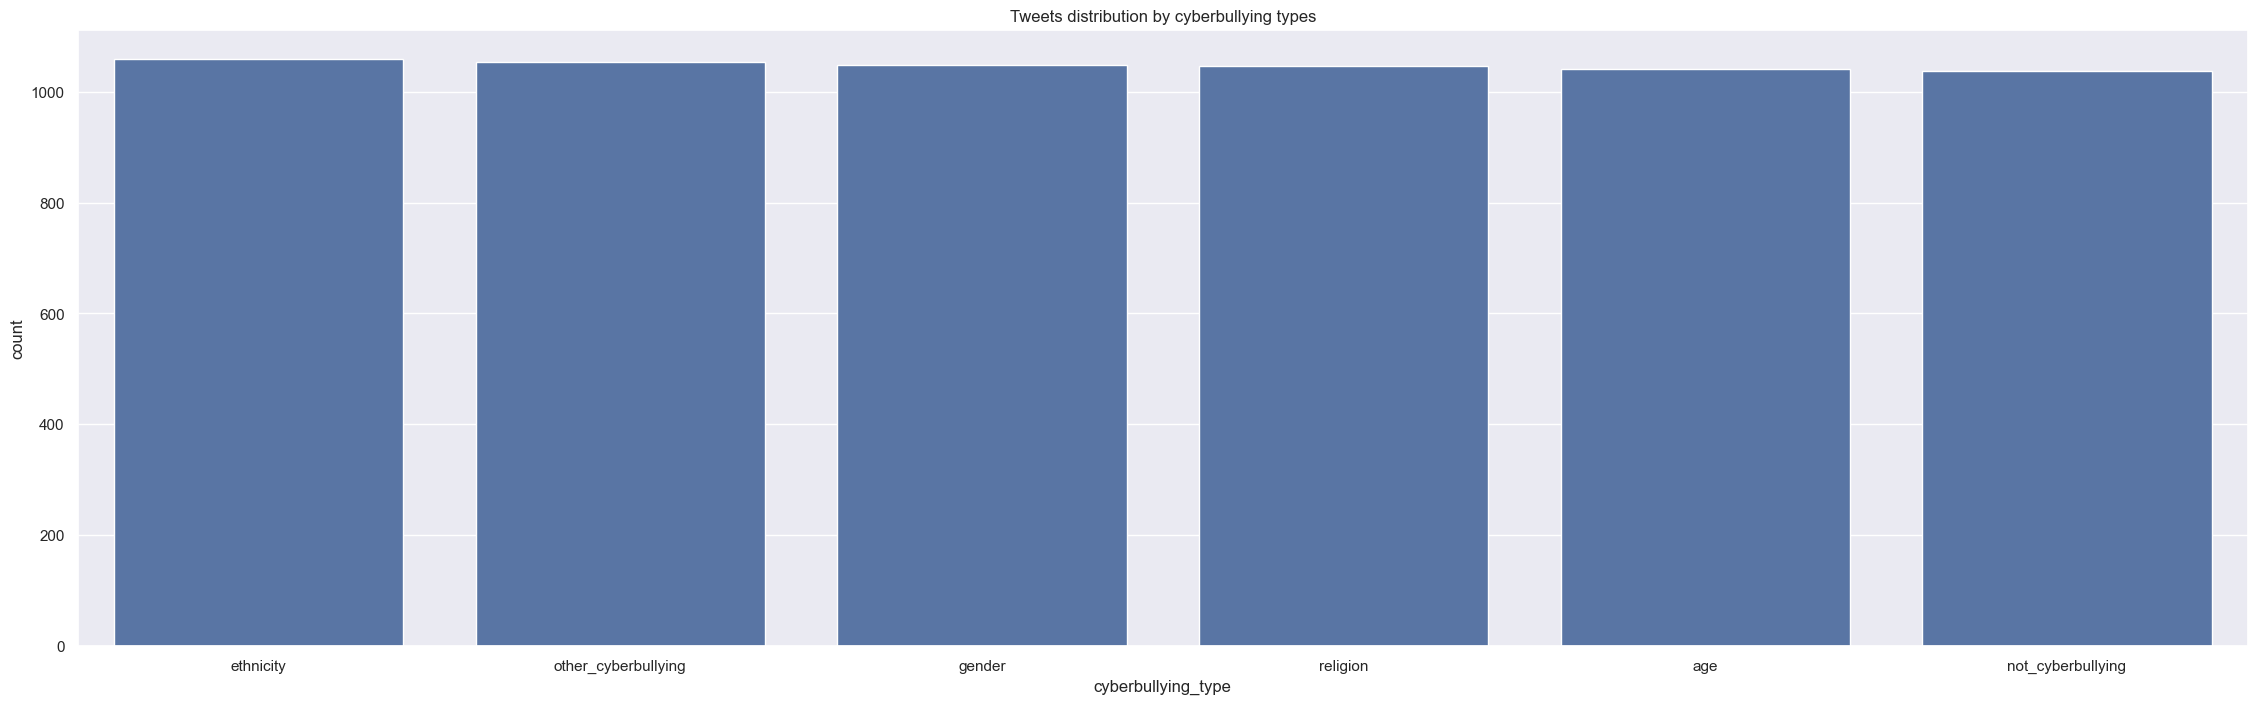

In [19]:
classes=list(df["cyberbullying_type"].unique())
df_list=[]

flux=700-800
for i in range(len(classes)):
    sub_df=df[df["cyberbullying_type"]==classes[i]]
    #drop first 7000 rows of sub_df
    if (classes[i]=="other_cyberbullying"):
        sub_df=sub_df.drop(sub_df.index[:6870+flux])
    elif (classes[i]=="religion"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])
    elif (classes[i]=="age"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])       
    else:
        sub_df=sub_df.drop(sub_df.index[:7000+flux])
    df_list.append(sub_df)


#concatenate all sub_df
df_dropped=pd.concat(df_list)
df_drop=df_dropped.reset_index()


df = df_drop
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [20]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dianu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dianu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dianu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dianu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
def initial_cleaning(text):
    text = re.sub(r"^RT[\s]+","",text)
    text = text.lower()
    text = re.sub(r"https?:\/\/.*[\r\n]*","https",text)
    text = re.sub(r"@[A-Za-z0-9]+","",text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "]+", flags=re.UNICODE)

    text=emoji_pattern.sub(r'', text)
    text = re.sub(r'[0-9]',' ',text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    return text

def remove_stopword(text):
    a = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
def lemmatizer(text):
    word_pos_tags = nltk.pos_tag(tokenizer.tokenize(text))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)



def text_preprocessing(text):
    return lemmatizer(stem(remove_stopword(initial_cleaning(text))))

df["original_tweet"] = df.tweet_text
df.tweet_text = df.tweet_text.apply(lambda x: text_preprocessing(x))
df

,index,tweet_text,cyberbullying_type,original_tweet
0,6904,peopl lol mkr,not_cyberbullying,Who are these people LOL #MKR
1,6905,huh might tri point,not_cyberbullying,@TURBOCUNT huh. i might have to try this at so...
2,6906,yeah men never comment athlet bodi ever,not_cyberbullying,"@johnnyrejection @espn Yeah, men never comment..."
3,6907,sociai,not_cyberbullying,sociais
4,6908,would problem crimin decid enter school lunch ...,not_cyberbullying,@JackBPR Which would not be a problem if a cri...
...,...,...,...,...
6281,47687,black ppl expect anyth depend anyth yet free p...,ethnicity,"Black ppl aren't expected to do anything, depe..."
6282,47688,turner withhold disappoint turner call court “...,ethnicity,Turner did not withhold his disappointment. Tu...
6283,47689,swear god dumb nigger bitch get bleach hair re...,ethnicity,I swear to God. This dumb nigger bitch. I have...
6284,47690,yea fuck rt your nigger fuck unfollow fuck dum...,ethnicity,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [22]:
text_list_p=df["tweet_text"].tolist()
labels_p=df["cyberbullying_type"].tolist()

text_list=[]
labels=[]
for i in range(len(labels_p)):
    if text_list_p[i]!='':
        text_list.append(text_list_p[i])
        labels.append(labels_p[i])

labels=np.array(labels)



label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
num_classes=int(np.max(integer_encoded)+1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(num_classes, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)



# randomly create indices for train and test
indices = np.arange(len(text_list))
np.random.shuffle(indices)
splitter=0.8
train_indices = indices[:int(splitter*len(text_list))]
test_indices = indices[int(splitter*len(text_list)):]
text_list_train = np.array(text_list)[train_indices]
text_list_test = np.array(text_list)[test_indices]
labels_train = np.array(labels)[train_indices]
labels_test = np.array(labels)[test_indices]
onehot_encoded_train = np.array(onehot_encoded)[train_indices]
onehot_encoded_test = np.array(onehot_encoded)[test_indices]
integer_encoded_train = np.array(integer_encoded)[train_indices]
integer_encoded_test = np.array(integer_encoded)[test_indices]







# doing for text_list_train
omega_text_words_train = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
for i in range(len(text_list_train)):
    sentence=text_list_train[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words_train.append(flat_list)


# doing for text_list_test
omega_text_words_test = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
for i in range(len(text_list_test)):
    sentence=text_list_test[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words_test.append(flat_list)


# doing for text_list
omega_text_words = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

 age  -----------------------------  [1. 0. 0. 0. 0. 0.]
 ethnicity  -----------------------------  [0. 1. 0. 0. 0. 0.]
 gender  -----------------------------  [0. 0. 1. 0. 0. 0.]
 not_cyberbullying  -----------------------------  [0. 0. 0. 1. 0. 0.]
 other_cyberbullying  -----------------------------  [0. 0. 0. 0. 1. 0.]
 religion  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [23]:
t = time()
w2v_model=Word2Vec(sentences=omega_text_words,vector_size=50,window=4,min_count=1,workers=cores-1,epochs=60,sg=1) #sh=1->Skip-gram,0->CBOW

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

#As we do not plan to train the model any further, we are calling init_sims(), which will make the model much more memory-efficient:
w2v_model.init_sims(replace=True)


Time to train the model: 0.08 mins


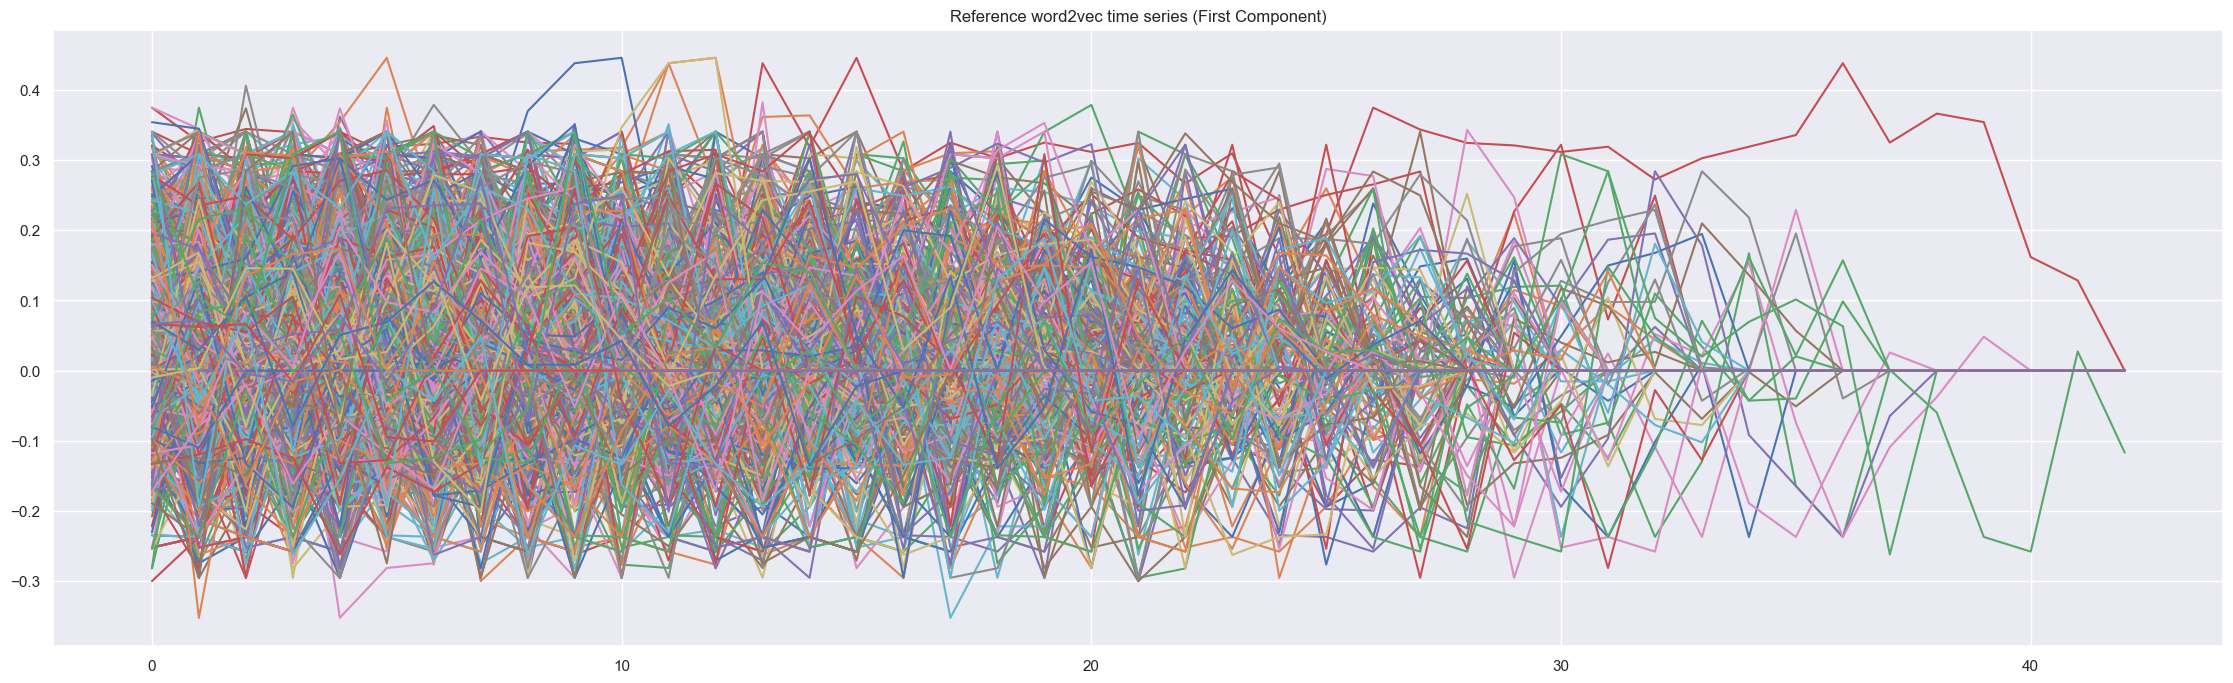

In [24]:
# getting word2vec embedding for train
ref_embedding_train=np.zeros((len(integer_encoded_train),max([len(i) for i in omega_text_words_train]),50))
for i in range(ref_embedding_train.shape[0]):
    sent=omega_text_words_train[i]
    for j in range(len(sent)):
        ref_embedding_train[i,j,:]=w2v_model.wv[omega_text_words_train[i][j]]


# getting word2vec embedding for test
ref_embedding_test=np.zeros((len(integer_encoded_test),max([len(i) for i in omega_text_words_test]),50))
for i in range(ref_embedding_test.shape[0]):
    sent=omega_text_words_test[i]
    for j in range(len(sent)):
        ref_embedding_test[i,j,:]=w2v_model.wv[omega_text_words_test[i][j]]


plt.figure()
for i in range(len(ref_embedding_test)):
    plt.plot(ref_embedding_test[i,:,0])
    plt.title("Reference word2vec time series (First Component)")     

In [25]:
print("Train Reduced Word Embeddings Shape: ",ref_embedding_train.shape)
print("Test Reduced Word Embeddings Shape: ",ref_embedding_test.shape)

Train Reduced Word Embeddings Shape:  (5017, 252, 50)
Test Reduced Word Embeddings Shape:  (1255, 43, 50)


In [26]:
# pad ref_embedding_test to 252 with 0.0
if ref_embedding_train.shape[1]<ref_embedding_test.shape[1]:
    ref_embedding_train=ref_embedding_train[:,:ref_embedding_test.shape[1],:]
    ref_embedding_train_pad=np.zeros((ref_embedding_train.shape[0],ref_embedding_test.shape[1],ref_embedding_test.shape[2]))
    ref_embedding_train_pad[:ref_embedding_train.shape[0],:ref_embedding_train.shape[1],:ref_embedding_train.shape[2]]=ref_embedding_train
    ref_embedding_train=ref_embedding_train_pad

if ref_embedding_train.shape[1]>ref_embedding_test.shape[1]:
    ref_embedding_test_pad=np.zeros((ref_embedding_test.shape[0],ref_embedding_train.shape[1],ref_embedding_test.shape[2]))
    ref_embedding_test_pad[:ref_embedding_test.shape[0],:ref_embedding_test.shape[1],:ref_embedding_test.shape[2]]=ref_embedding_test
    ref_embedding_test=ref_embedding_test_pad


In [27]:
print("Train Reduced Word Embeddings Shape: ",ref_embedding_train.shape)
print("Test Reduced Word Embeddings Shape: ",ref_embedding_test.shape)

Train Reduced Word Embeddings Shape:  (5017, 252, 50)
Test Reduced Word Embeddings Shape:  (1255, 252, 50)


In [28]:
time_stretched2_train=100*ref_embedding_train
time_stretched2_test=100*ref_embedding_test

In [29]:
# create a time_stratched2_train into two arrays of same shape, where in first array the first half of the array is zero and in second array the second half of the array is zero
time_stretched2_train_1=np.zeros((time_stretched2_train.shape[0],time_stretched2_train.shape[1],time_stretched2_train.shape[2]))
time_stretched2_train_2=np.zeros((time_stretched2_train.shape[0],time_stretched2_train.shape[1],time_stretched2_train.shape[2]))
for i in range(time_stretched2_train.shape[0]):
    time_stretched2_train_1[i,:int(time_stretched2_train.shape[1]/2),:]=time_stretched2_train[i,:int(time_stretched2_train.shape[1]/2),:]
    time_stretched2_train_2[i,int(time_stretched2_train.shape[1]/2):,:]=time_stretched2_train[i,int(time_stretched2_train.shape[1]/2):,:]

In [34]:
max_size=time_stretched2_train.shape[1]
very_red_size=time_stretched2_train.shape[2]


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


# define keras model
def create_model():
    inputs = layers.Input(shape=(max_size,very_red_size))
    head_size = 4
    num_heads = 2
    ff_dim = 32
    num_transformer_blocks = 3
    dropout = 0.2

    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(20, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(max_size*very_red_size, activation="linear")(x)
    # rehape to 2D signal
    outputs = layers.Reshape((max_size,very_red_size))(outputs)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss="mse",
        metrics=["accuracy"],
    )
    return model


model = create_model()

model.summary()
model.fit(time_stretched2_train_1,time_stretched2_train_2, epochs=20, verbose=2)



# create a new keras model that removes the output layer of the trained model
feature_extractor = keras.Model(
    inputs=model.inputs, outputs=model.layers[-2].output
)

# create a new model with feature extractor and dense layer
inputs = keras.Input(shape=(max_size,very_red_size))
x = feature_extractor(inputs)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

model.summary()
model.fit(time_stretched2_train,onehot_encoded_train, epochs=40, verbose=2,validation_data=(time_stretched2_test,onehot_encoded_test))



Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 252, 50)]    0           []                               
                                                                                                  
 layer_normalization_18 (LayerN  (None, 252, 50)     100         ['input_7[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_9 (MultiH  (None, 252, 50)     1674        ['layer_normalization_18[0][0]', 
 eadAttention)                                                    'layer_normalization_18[0][0]'] 
                                                                                            

40/40 [==============================] - 1s 6ms/step


<Axes: >

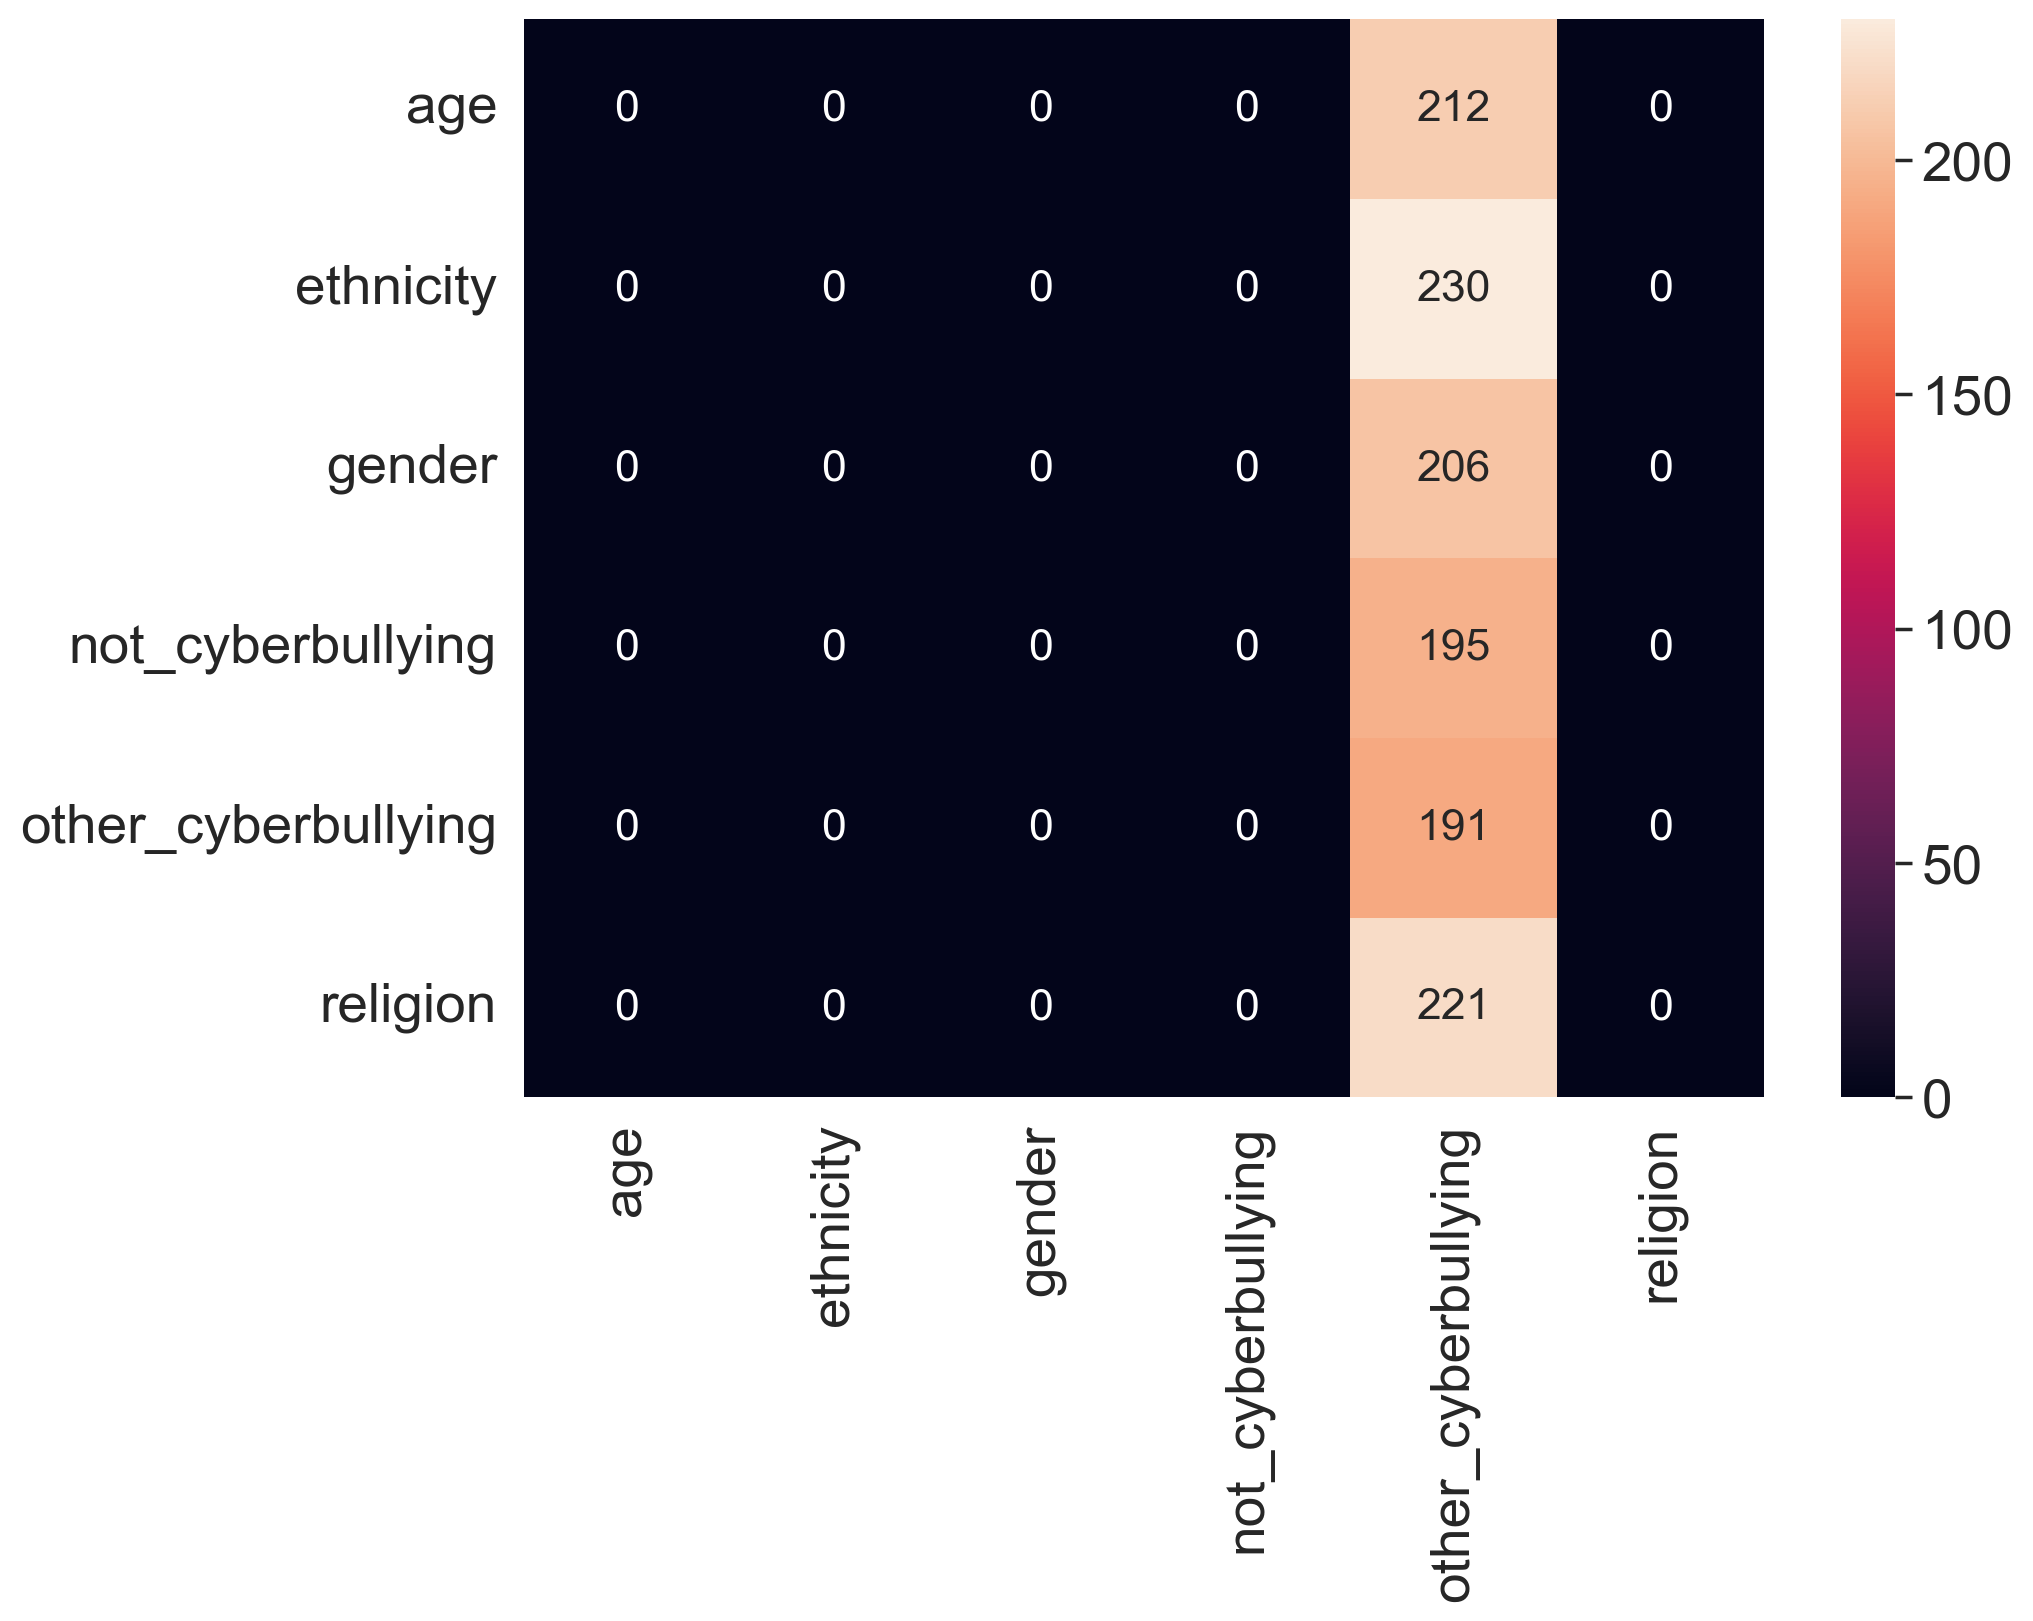

In [35]:
ref=np.argmax(onehot_encoded_test,axis=1)
predictions=np.argmax(model.predict(time_stretched2_test),axis=1)
cm=confusion_matrix(ref,predictions)


label_names=[]
for key,_ in mapping.items():
    label_names.append(key)

    
#plot confusion matrix

df_cm = pd.DataFrame(cm, label_names,label_names)
plt.figure(figsize = (10,7),dpi=200)
sn.set(font_scale=1.8)  # Increase the font size for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='d') # font size

In [36]:
print(classification_report(ref, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       212
           1     0.0000    0.0000    0.0000       230
           2     0.0000    0.0000    0.0000       206
           3     0.0000    0.0000    0.0000       195
           4     0.1522    1.0000    0.2642       191
           5     0.0000    0.0000    0.0000       221

    accuracy                         0.1522      1255
   macro avg     0.0254    0.1667    0.0440      1255
weighted avg     0.0232    0.1522    0.0402      1255

